<a href="https://colab.research.google.com/github/gabriellfelipe7/AnaliseExploratoria_AverageCostStudentUSA/blob/main/AnaliseExploratoria_AverageCostStudentUSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Average cost of undergraduate student by state USA**
- Gabriel Felipe Machado de Oliveira
- Março de 2023

## **1. Informações do Dataset**

### **1.1. Extração e informações da base**

A base de dados utilizada foi construída a partir de dados da agência National Center for Education Statistics (Centro Nacional de Estatísticas da Educação.) A agência publica anualmente a relação completa das variáveis, para o estudo, reuniu-se dados do ano de 2013 a 2021.

Traz informações relacionadas às universidades e aos estudantes em diveros estados dos Estados Unidos.

A extração foi feita através do site Kaggle. Segue o link para dowload e visualização: https://www.kaggle.com/datasets/bhargavchirumamilla/average-cost-of-undergraduate-student-by-state-usa

### **1.2. Variáveis do dataset**

Há no estudo 6 colunas/variáveis, sendo elas:
- Year: o ano considerado na abordagem dos estudantes;
- State: o estado onde a universdade se localiza;
- Type: o tipo da universidade podendo ser pública ou privada; 
- Length: a duração do curso em anos baseada no tipo de programa utilizado pelo estudante;
- Expense: os tipos de gastos e despesas que o estudante teve durante o tempo de estudo;
- Value: o custo médio das despesasem dólares americanos USD ($).

### **1.3. Tamanho do dataset**

A base de dados extraída possui um total de 6 colunas e 3548 linhas.

## **2. Objetivos**

### **2.1. Introdução** 
O relatório possui como principal objetivo analisar e explorar de maneira descritiva os dados em questão. Para isso, algumas técnicas bem definidas de Visuzalição e Exploração de Dados foram utilizadas.

Busca-se, em última instância, estimar parâmetros e características de toda população de estudantes dos Estados Unidos. 

A fim de amparar e basear todo o projeto, alguns tópicos foram levantados. 

### **2.1. Definições e tópicos de abordagens** 

Seguem abaixo algumas perguntas que serão investigadas no projeto:
- Qual o ano em que os estudantes tiveram maior custo?
- Qual o tipo de gasto mais comum entre os estudantes da base?
- Quais são as médias de custo dos estudantes em cada estado?
- Qual o estado mais caro para se estudar, considerando a média de custo? 
- Quais são as médias de custo entre estudantes de universidades públicas e particulares. Essa diferença é estatisticamente significativa significativa?
- Cosiderando a duração do curso, calcule as médias de custos entre as possíveis durações e se essa diferença é estatisticamnete significativa.


Além dessas questões, outras ainda podem surgir a partir do desenvolvimento do projeto.

## **3. Extração e limpeza da base de dados**

Nesta etapa, com o auxílio de algumas bibliotecas, focaremos na extração e na limpeza do dataset.

In [1]:
#Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as sts

In [2]:
#Extração dos dados e visualização
data = pd.read_csv('/content/nces330_20.csv')
display(data)

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473
...,...,...,...,...,...,...
3543,2021,Wyoming,Public In-State,2-year,Fees/Tuition,3987
3544,2021,Wyoming,Public In-State,4-year,Room/Board,9799
3545,2021,Wyoming,Public Out-of-State,2-year,Fees/Tuition,9820
3546,2021,Wyoming,Public Out-of-State,4-year,Fees/Tuition,14710


In [ ]:
#Verificação dos tipos dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


In [ ]:
#Tamanho
data.shape

(3548, 6)

In [ ]:
#Buscando valores vazios
data.isnull()

,Year,State,Type,Length,Expense,Value
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3543,False,False,False,False,False,False
3544,False,False,False,False,False,False
3545,False,False,False,False,False,False
3546,False,False,False,False,False,False


In [ ]:
#Bucando valores nulos
data.isna()

,Year,State,Type,Length,Expense,Value
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3543,False,False,False,False,False,False
3544,False,False,False,False,False,False
3545,False,False,False,False,False,False
3546,False,False,False,False,False,False


Não há dados para limpeza, logo, estão prontos para a análise.

## **4. Análise das variáveis** 

### **4.1. Variável: Year**

In [14]:
#Possíveis valores
display(pd.DataFrame(data = data['Year'].value_counts()))

,Year
2013,403
2014,403
2015,403
2016,403
2017,401
2018,398
2019,396
2020,396
2021,345


<AxesSubplot:title={'center':'Distribuição de Frequências: Year'}, xlabel='Year', ylabel='Frequência'>

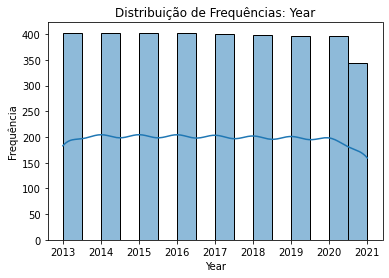

In [18]:
#Histograma de frequências
plt.xlabel('Year')

plt.ylabel('Frequência')
plt.title('Distribuição de Frequências: Year')
sns.histplot(data=data, x="Year", kde=True)

Nota-se que no ano de 2021 os dados diminuíram. Passando de 396 em 2020 para 245 em 2021.

### **4.2. Variável: State**

In [ ]:
#